In [84]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from math import exp, log

### Create dummy dataset

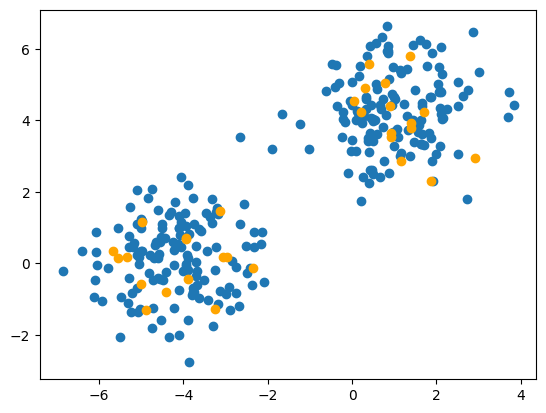

In [85]:
N_FEATURES = 2
X, Y = make_blobs(n_samples=300, centers=2, n_features=N_FEATURES, random_state=3)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1], c='orange')
plt.show()

ones = np.ones((len(X_train), 1))
X_train = np.hstack((ones, X_train))
ones = np.ones((len(X_test), 1))
X_test = np.hstack((ones, X_test))

### Run perceptron algorithm

[1/10] Loss: -20.723266105946422


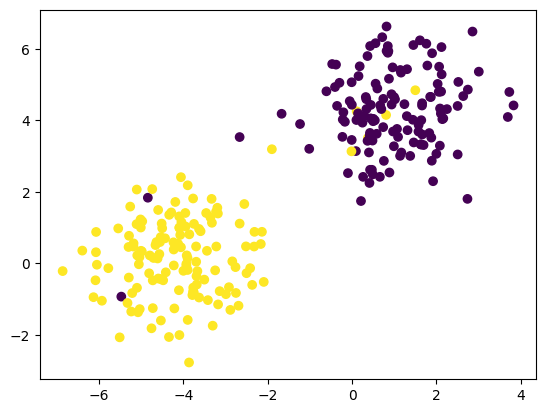

[2/10] Loss: -20.723266105946422


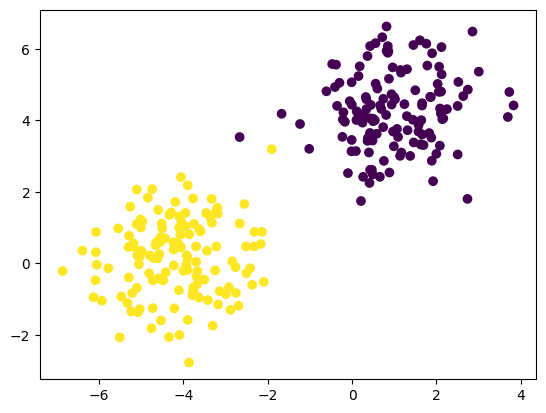

[3/10] Loss: -20.723266105946422


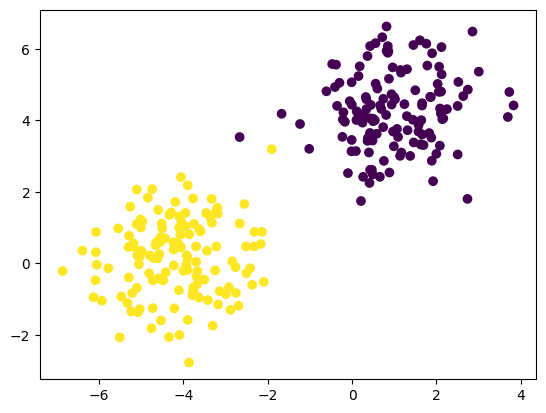

[4/10] Loss: -20.723266105946422


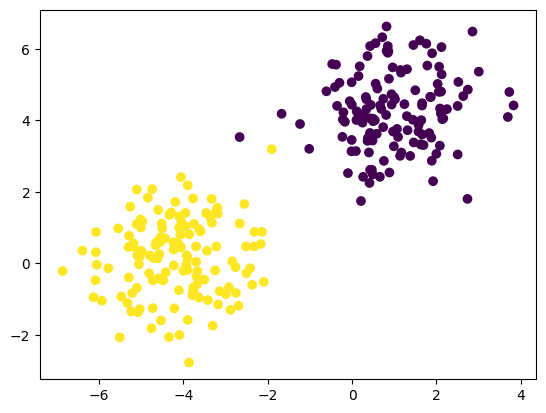

[5/10] Loss: -20.723266105946422


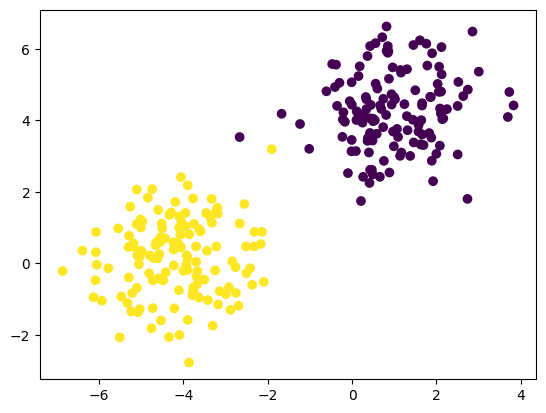

[6/10] Loss: -2.6999999249887756e-07


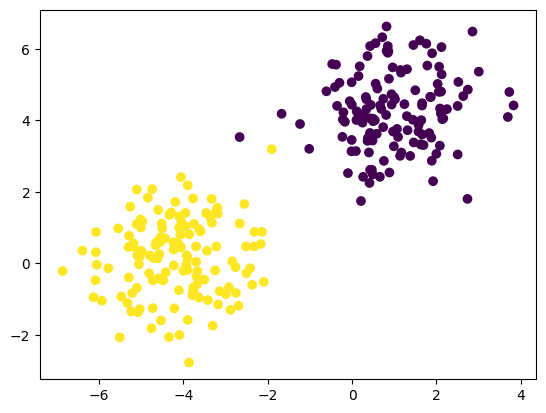

[7/10] Loss: -2.6999999249887756e-07


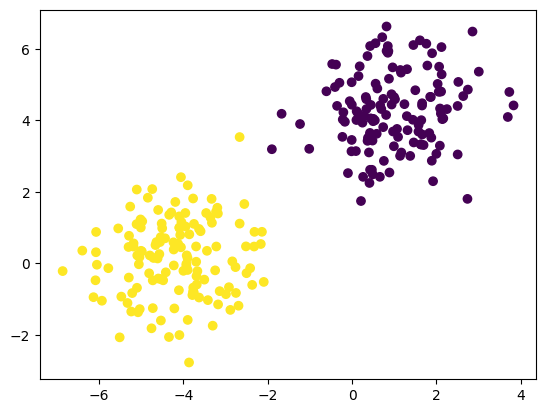

[8/10] Loss: -2.6999999249887756e-07


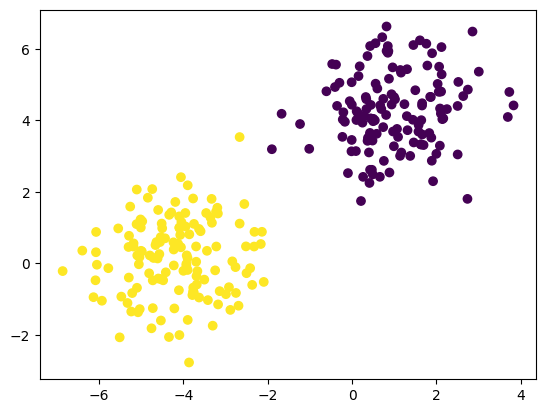

[9/10] Loss: -2.6999999249887756e-07


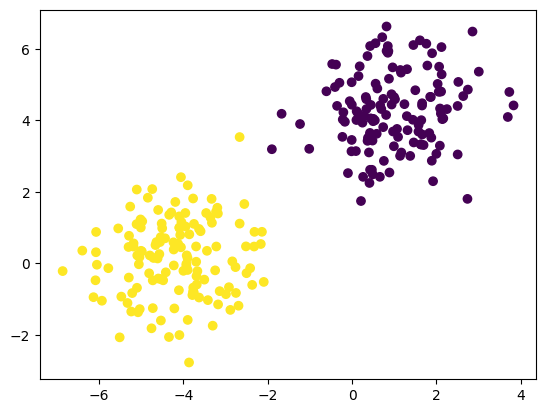

[10/10] Loss: -2.6999999249887756e-07


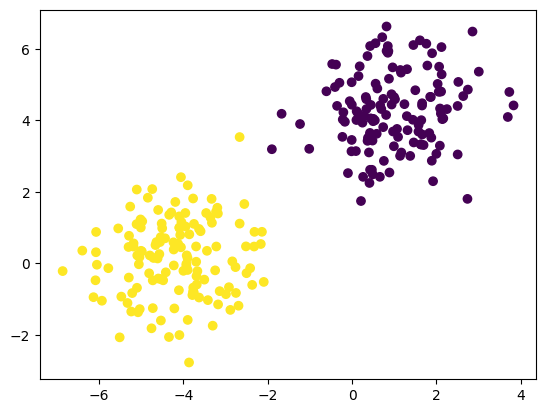

In [86]:
theta = np.ones(N_FEATURES + 1).reshape(N_FEATURES + 1, 1)
LEARNING_RATE = 0.1
ITERS = 10

def perceptron_function(z):
    if (z >= 0):
        return 1
    else: 
        return 0
    
def update_parameters(theta, x, y, h_x):
    x = np.reshape(x, theta.shape)
    return theta + LEARNING_RATE * (y - h_x) * x

def calc_loss(X, Y, theta):
    loss = 0
    for x, y in zip (X, Y):
        h_x = calc_hypothesis(theta, x)
        if h_x == 0: h_x += 0.000000001
        elif h_x == 1: h_x -= 0.000000001
        loss += y * log(h_x) + (1-y) * log(1-h_x)
    return loss

def calc_hypothesis(theta, x):
    h_x = theta.T @ x
    h_x = perceptron_function(h_x)
    return h_x

# holds hypothesis for each data point to be plotted
H_train = np.zeros((len(X_train), 1))

# Run perceptron algorithm
for iter in range(ITERS):
    for i, (x,y) in enumerate(zip(X_train,Y_train)):
        h_x = calc_hypothesis(theta, x)
        H_train[i] = h_x
        
        theta = update_parameters(theta, x, y, h_x)

    loss = calc_loss(X_train, Y_train, theta)
    print(f"[{iter+1}/{ITERS}] Loss: {loss}")

    plt.scatter(X_train[:,1], X_train[:, 2], c=H_train[:, 0])
    plt.show()

### Test

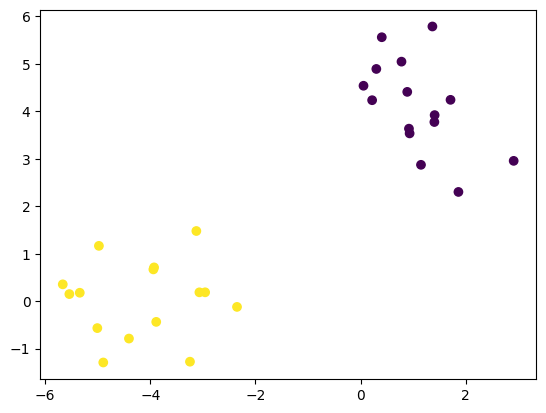

In [87]:
# holds hypothesis for each test data point
H_test = np.zeros((len(X_test), 1))

for i, (x,y) in enumerate(zip(X_test, Y_test)):
    h_x = calc_hypothesis(theta, x)
    H_test[i] = h_x

plt.scatter(X_test[:, 1], X_test[:, 2], c=H_test)
plt.show()